dragon real estate - price predictor

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


reading the file


In [ ]:
housing = pd.read_csv("/content/data.csv")

In [ ]:
housing.shape

(506, 14)

In [ ]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
housing['CHAS'].value_counts()

,count
CHAS,
0,471
1,35


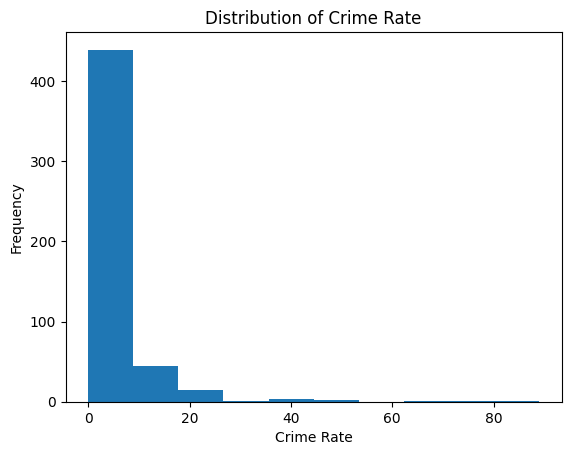

In [ ]:
plt.hist(housing['CRIM'])  # Replace 'CRIM' with the column you want to visualize
plt.xlabel("Crime Rate")  # Label for the x-axis
plt.ylabel("Frequency")  # Label for the y-axis
plt.title("Distribution of Crime Rate")  # Title of the histogram
plt.show()  # Display the histogram

histogram plots


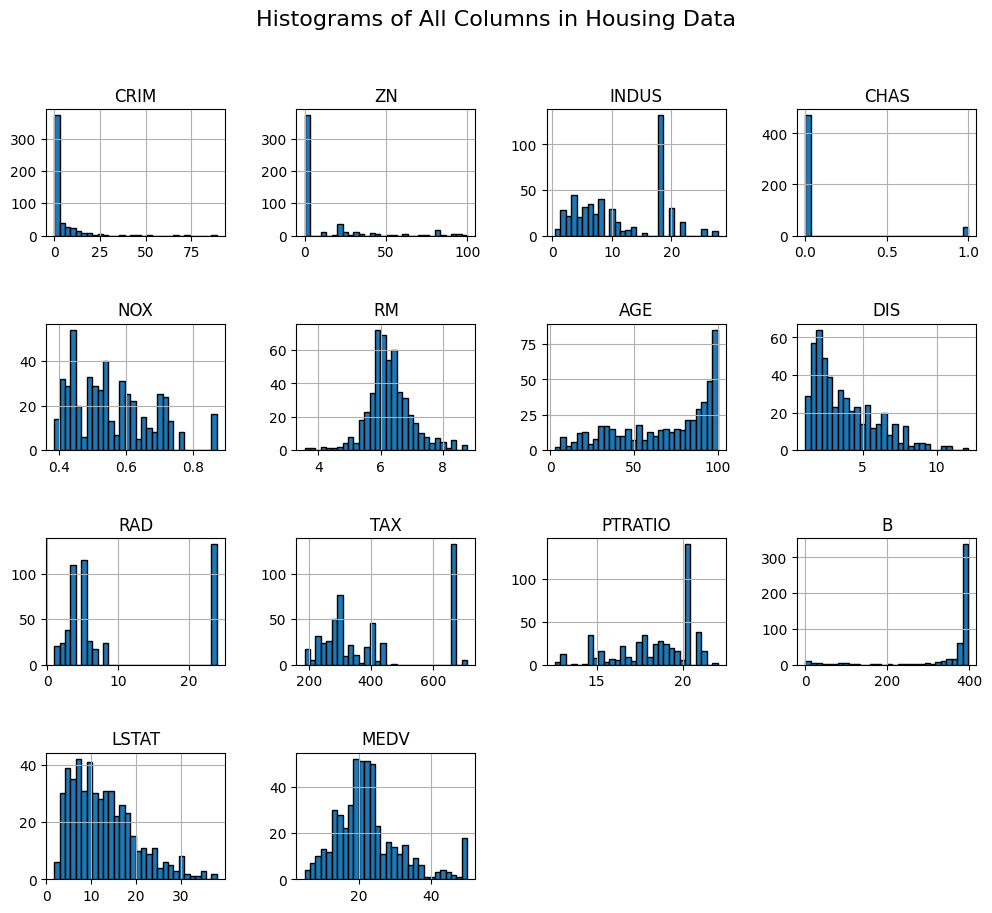

In [ ]:
housing.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4) # Adjust spacing
plt.suptitle("Histograms of All Columns in Housing Data", fontsize=16)
plt.show()

In [ ]:
import numpy as np


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [ ]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [ ]:
strat_test_set['CHAS'].value_counts()

,count
CHAS,
0,95
1,7


In [ ]:
strat_train_set['CHAS'].value_counts()

,count
CHAS,
0,376
1,28


In [ ]:
95/7

13.571428571428571

In [ ]:
376/28

13.428571428571429

In [ ]:
housing = strat_train_set.copy()

looking for corelations


In [ ]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

,MEDV
MEDV,1.000000
RM,0.680857
B,0.361761
ZN,0.339741
DIS,0.240451
CHAS,0.205066
AGE,-0.364596
RAD,-0.374693
CRIM,-0.393715
NOX,-0.422873


array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

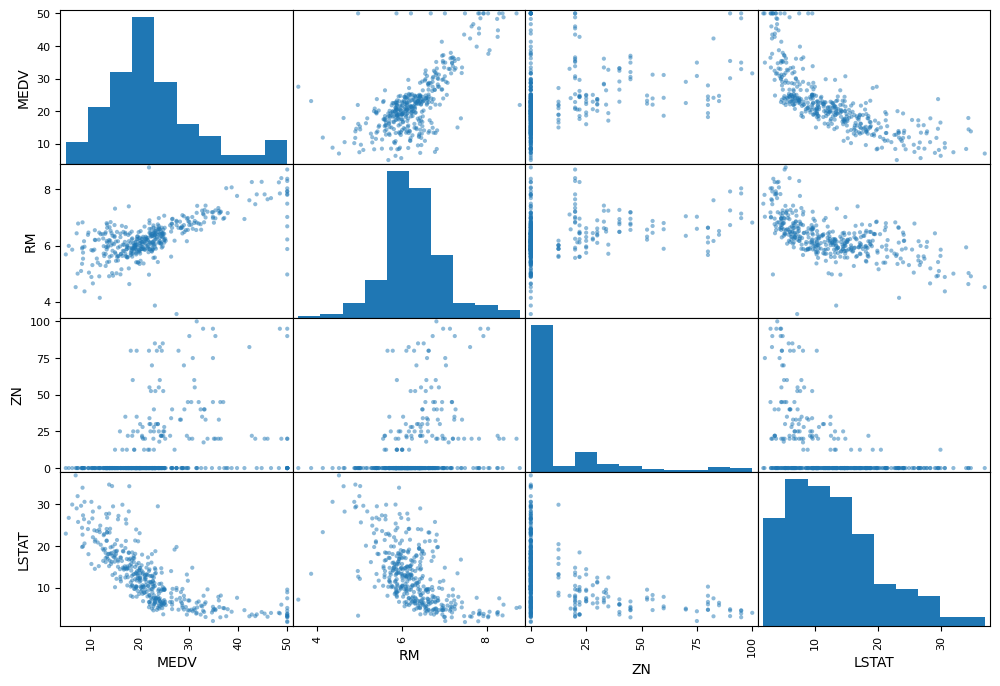

In [ ]:
  from pandas.plotting import scatter_matrix
  attributes = ["MEDV", "RM", "ZN", "LSTAT"]
  scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

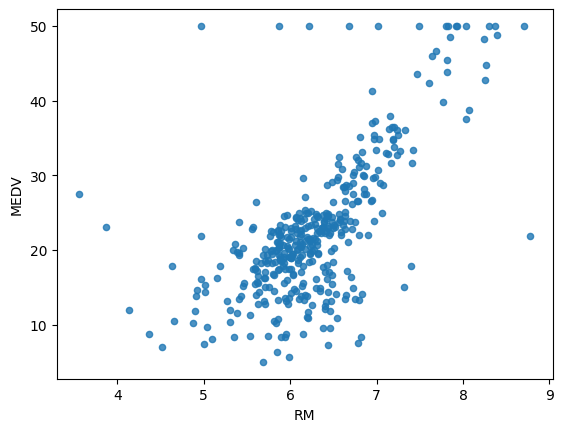

In [ ]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

trying out attribute combinations


In [ ]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [ ]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [ ]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

,MEDV
MEDV,1.000000
RM,0.680857
B,0.361761
ZN,0.339741
DIS,0.240451
CHAS,0.205066
AGE,-0.364596
RAD,-0.374693
CRIM,-0.393715
NOX,-0.422873


<Axes: xlabel='TAXRM', ylabel='MEDV'>

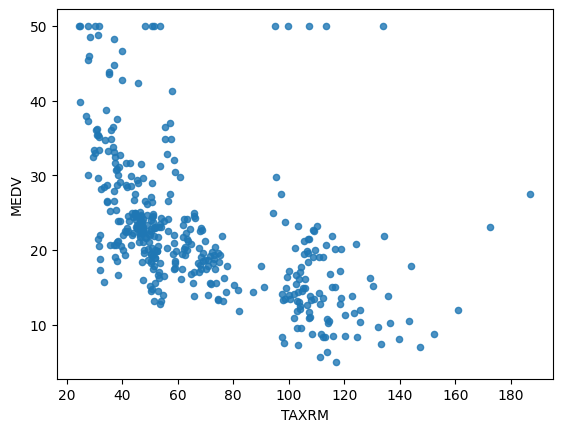

In [ ]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [ ]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

missing attributes

In [ ]:
a = housing.dropna(subset=["RM"]) #Option 1
a.shape
# Note that the original housing dataframe will remain unchanged

(399, 13)

In [ ]:
housing.drop("RM", axis=1).shape # Option 2
# Note that there is no RM column and also note that the original housing dataframe will remain unchanged

(404, 12)

In [ ]:
median = housing["RM"].median() # Compute median for Option 3

In [ ]:
housing["RM"].fillna(median) # Option 3
# Note that the original housing dataframe will remain unchanged

,RM
254,6.108
348,6.635
476,6.484
321,6.376
326,6.312
...,...
155,6.152
423,6.103
98,7.820
455,6.525


In [ ]:
housing.shape

(404, 13)

In [ ]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [ ]:
X = imputer.transform(housing)

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [ ]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


creating a pipeline


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [ ]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [ ]:
housing_num_tr.shape

(404, 13)

selecting a desired model for dragon real estate

In [ ]:
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [ ]:
some_data = housing.iloc[:5]

In [ ]:
some_labels = housing_labels.iloc[:5]

In [ ]:
prepared_data = my_pipeline.transform(some_data)

In [ ]:
model.predict(prepared_data)

array([22.181, 25.867, 16.533, 23.355, 23.563])

In [ ]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

evaluating the model

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [ ]:
rmse

np.float64(1.1634627345357758)

In [ ]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [ ]:
rmse_scores

array([3.06851255, 2.79012942, 4.34585386, 2.6654827 , 3.40184972,
       2.59399444, 4.93900225, 3.36006333, 3.15214845, 3.14108135])

In [ ]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [ ]:
print_scores(rmse_scores)

Scores: [3.06851255 2.79012942 4.34585386 2.6654827  3.40184972 2.59399444
 4.93900225 3.36006333 3.15214845 3.14108135]
Mean:  3.345811807552498
Standard deviation:  0.7095673419567392


In [ ]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

In [ ]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [ ]:
final_rmse

np.float64(2.8770535632626575)

In [ ]:
import pandas as pd

# Your RMSE results
models = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor']
rmse_train = [4.8, 0, 1.16]
rmse_cv = [5.03, 4.5, 3.34]
rmse_test = [4.14, 4.2, 2.87]

# Create DataFrame
results_df = pd.DataFrame({
    'Model': models,
    'RMSE (Train)': rmse_train,
    'RMSE (CV Mean)': rmse_cv,
    'RMSE (Test)': rmse_test
})

print(results_df)


                     Model  RMSE (Train)  RMSE (CV Mean)  RMSE (Test)
0        Linear Regression          4.80            5.03         4.14
1  Decision Tree Regressor          0.00            4.50         4.20
2  Random Forest Regressor          1.16            3.34         2.87


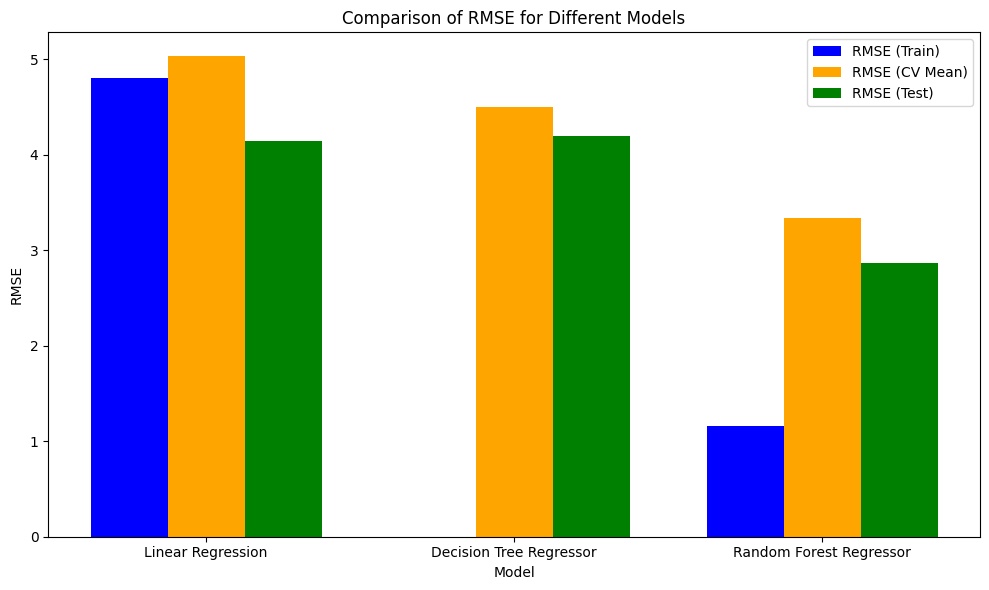

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
bar_width = 0.25
index = range(len(models))

# Plot bars for each RMSE type
plt.bar([i - bar_width for i in index], rmse_train, width=bar_width, label='RMSE (Train)', color='blue')
plt.bar(index, rmse_cv, width=bar_width, label='RMSE (CV Mean)', color='orange')
plt.bar([i + bar_width for i in index], rmse_test, width=bar_width, label='RMSE (Test)', color='green')

plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different Models')
plt.xticks(index, models)
plt.legend()
plt.tight_layout()
plt.show()


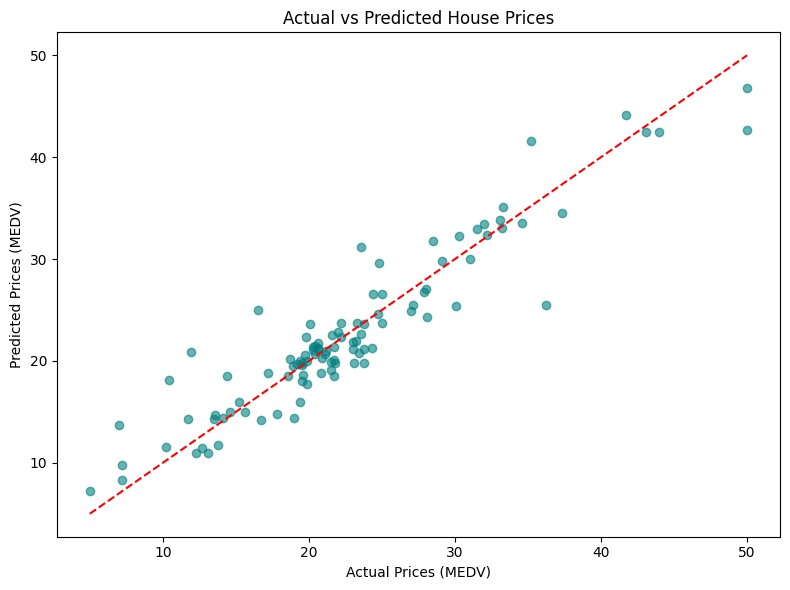

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(Y_test, final_predictions, alpha=0.6, color='teal')
plt.xlabel("Actual Prices (MEDV)")
plt.ylabel("Predicted Prices (MEDV)")
plt.title("Actual vs Predicted House Prices")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Diagonal line
plt.tight_layout()
plt.show()


In [ ]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [ ]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib')
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([25.036])